In [1]:
from google.colab import drive
import sys
sys.path.insert(0,'/content/drive/My Drive/ColabNotebooks')
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Colab\ Notebooks

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [ ]:
!pip install selectivesearch

In [3]:
from datasetGenerator import DatasetGenerator
from dataLoader import DataLoader
import numpy as np
import skimage
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
np.seterr(divide='ignore', invalid='ignore')


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [4]:
%cd /content/drive/My Drive/Colab Notebooks/HW06_folder

/content/drive/My Drive/Colab Notebooks/HW06_folder


In [5]:
%ls

codes/  dataset/  dataset.npy


In [6]:
"""Get the dataset and extract features"""
dl = DataLoader()
dg = DatasetGenerator(dl)
"""This method is relatively slow. You can download pre-computed dataset here
https://drive.google.com/file/d/1SGJWgt3z6S44uo6GI9sFuX_WGvOoZ-8z/view?usp=sharing
"""
dg.prepareDataset()
f1, t1, t2 = dg.extract_features_targets_pairs()

There are 204 images in dataset
193 images for train set and 11 for test set
Dataset classes {1: 'C', 2: 'dead', 3: 'T', 4: 'weapon', 0: 'background'}
Loading Dataset ...
Done


100%|██████████| 193/193 [03:11<00:00,  1.01it/s]


In [10]:
"""Delete features with NaN values"""
f1, t1, t2 = np.array(f1), np.array(t1), np.array(t2)
print(f1.shape, t1.shape, t2.shape)
f1 = pd.DataFrame(f1)

(6141, 24) (6141,) (6141, 4)


In [11]:
f1

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.042323,0.018082,0.010415,0.006107,0.004457,0.003524,0.005039,0.006002,0.008600,0.013080,...,0.015626,0.007570,0.007279,0.004554,0.006659,0.006144,0.011318,0.020844,0.038314,0.529568
1,0.030119,0.020839,0.013443,0.008085,0.004317,0.003375,0.003600,0.004176,0.005962,0.010729,...,0.009323,0.004879,0.003895,0.003333,0.005779,0.010419,0.017900,0.023651,0.024579,0.573815
2,0.064222,0.021556,0.005333,0.002444,0.002444,0.003111,0.007778,0.006444,0.004000,0.002889,...,0.010000,0.009778,0.013111,0.004222,0.013556,0.006000,0.008444,0.017556,0.025333,0.560444
3,0.109412,0.007059,0.003137,0.001569,0.003922,0.005490,0.003137,0.005490,0.008235,0.010980,...,0.010588,0.007843,0.017255,0.007059,0.008627,0.004706,0.012549,0.005882,0.001961,0.703529
4,0.003728,0.001119,0.000692,0.000799,0.001278,0.000905,0.002130,0.004101,0.005965,0.004314,...,0.046551,0.008415,0.045113,0.003462,0.004261,0.001758,0.003622,0.003675,0.004687,0.748975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6136,0.072796,0.026187,0.020298,0.014934,0.012314,0.011252,0.012783,0.014190,0.017623,0.021636,...,0.014672,0.009598,0.009294,0.009239,0.009212,0.011335,0.014907,0.022739,0.033481,0.492788
6137,0.072796,0.026187,0.020298,0.014934,0.012314,0.011252,0.012783,0.014190,0.017623,0.021636,...,0.014672,0.009598,0.009294,0.009239,0.009212,0.011335,0.014907,0.022739,0.033481,0.492788
6138,0.072796,0.026187,0.020298,0.014934,0.012314,0.011252,0.012783,0.014190,0.017623,0.021636,...,0.014672,0.009598,0.009294,0.009239,0.009212,0.011335,0.014907,0.022739,0.033481,0.492788
6139,0.072000,0.026763,0.020413,0.014829,0.012234,0.011169,0.012671,0.014187,0.017601,0.021615,...,0.014487,0.009585,0.008780,0.009217,0.009203,0.011238,0.014924,0.022940,0.034491,0.492859


In [12]:
nan = f1.isnull().any(axis=1)
f1 = f1[~nan]
t1 = t1[~nan]
t2 = t2[~nan]
print(f1.shape, t1.shape, t2.shape)

(6141, 24) (6141,) (6141, 4)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(f1, t1, test_size=0.33, random_state=42)

In [24]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30) 

KNeighborsClassifier
****Results****
Accuracy: 93.6852%
Log Loss: 1.0463670863319512
SVC
****Results****
Accuracy: 54.9087%
Log Loss: 0.9119897237255008
DecisionTreeClassifier
****Results****
Accuracy: 94.4746%
Log Loss: 1.9084079705130765
RandomForestClassifier
****Results****
Accuracy: 97.7800%
Log Loss: 0.11142149640943125
AdaBoostClassifier
****Results****
Accuracy: 58.7074%
Log Loss: 1.3217428883620685
GradientBoostingClassifier
****Results****
Accuracy: 95.8066%
Log Loss: 0.1720510162624159
GaussianNB
****Results****
Accuracy: 56.3888%
Log Loss: 3.496387091467124
LinearDiscriminantAnalysis
****Results****
Accuracy: 68.8209%
Log Loss: 0.902965918337204
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 84.6571%
Log Loss: 1.1045515829346237


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


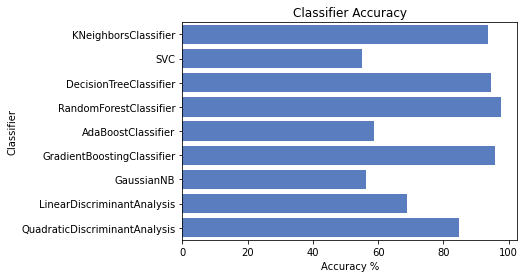

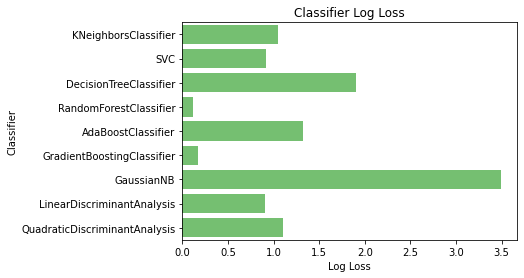

In [26]:
import seaborn as sns
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [29]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 650, 1100, 1550, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [31]:
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 35, 60, 85, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 650, 1100, 1550,
                                                         2000]},
                   random_state=42, verbose=2)

In [32]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [38]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    acc = accuracy_score(test_labels, predictions)
    print("Accuracy: {:.4%}".format(acc))
    return acc

base_model = RandomForestClassifier()
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

clf = best_random

Accuracy: 97.8293%
Accuracy: 98.1253%
Improvement of 0.30%.


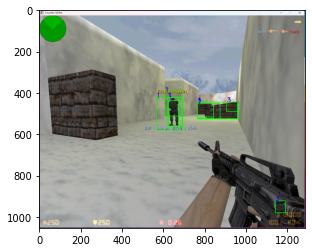

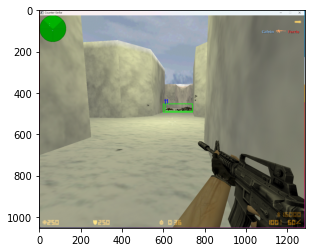

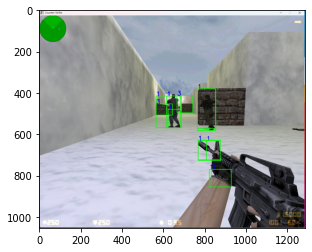

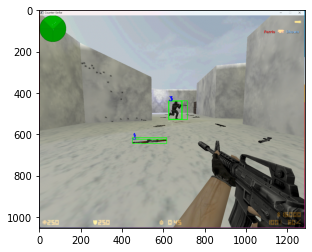

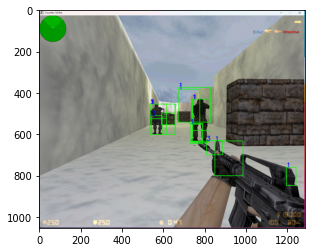

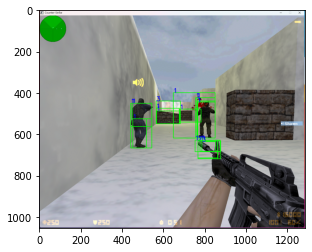

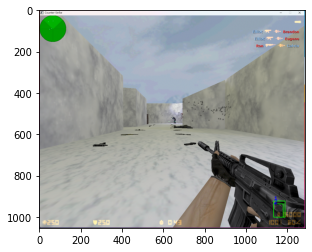

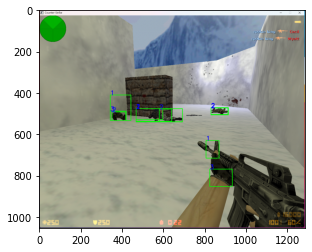

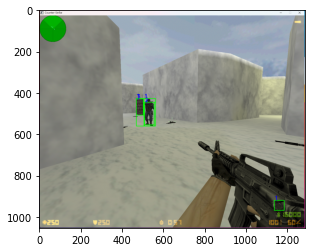

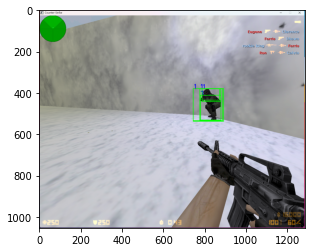

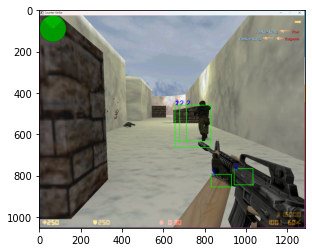

In [39]:
import cv2
"""
Object detection on test images
"""
for image in dl.getAllTestData():
    candidates = extract_candidates(image)
    features = []
    
    # Extract features of each ROI
    for candidate in candidates: 
        features.append(dg.extract_features_roi(skimage.color.rgb2gray(image), candidate))

    features = np.array(features)
    classes = clf.predict(features)

    # Show Bounding Boxes with their classes.
    for i in range(len(candidates)):
        candidate = candidates[i]
        if classes[i] != '0':
            distance = candidate[2] - candidate[0]
            width = candidate[3] - candidate[1]
            if distance < 225 and width < 225:
                cv2.rectangle(image, (candidate[0], candidate[1]), (candidate[2], candidate[3]), (0, 255, 0), 2)
                cv2.putText(image, str(classes[i]), (candidate[0], candidate[1]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
        
    plt.imshow(image)
    plt.show()

In [197]:
for image in dl.getAllTestData():
  break

In [233]:
import cv2
"""
Object detection on test images
"""
for image in dl.getAllTestData():
    candidates = extract_candidates(image)
    features = []
    
    # Extract features of each ROI
    for candidate in candidates: 
        features.append(dg.extract_features_roi(skimage.color.rgb2gray(image), candidate))

    features = np.array(features)
    classes = clf.predict(features)

    candids = []
    for i in range(len(candidates)):
      if classes[i] != '0':
        candids.append(candidates[i])

    for i , item in enumerate(candids):
      for item1 in candidates:
        if get_iou(item , item1) > 0.5:
          a = [np.max([item[0],item1[0]]),np.max([item[1],item1[1]]),np.max([item[2],item1[2]]),np.max([item[3],item1[3]])]
          candids[i] = a
        else:
          continue
    break

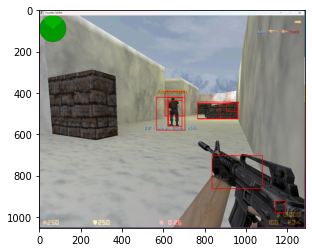

In [234]:
img = image.copy()
for item1 in candids:
  if item1 != [0 , 0 ,0 ,0]:
    cv2.rectangle(img, (item1[0], item1[1]), (item1[2], item1[3]), (255, 0, 0), 2)

plt.imshow(img)
plt.show()

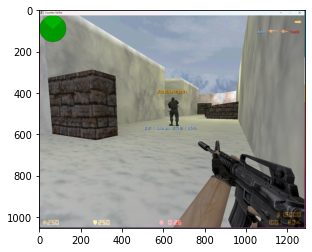

In [235]:
plt.imshow(image)
plt.show()

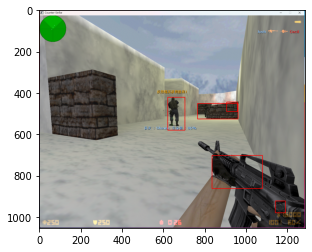

In [245]:
ij = image.copy()
cd = candids.copy()
for i , item in enumerate(candids):
  for j , item1 in enumerate(candids):
    if item != [0,0,0,0] and item1 != [0,0,0,0] and not np.array_equal(np.asarray(item) - np.asarray(item1), np.asarray([0 , 0, 0 ,0])):
      if get_iou(item , item1) > 0.2:
        a = [np.max([item[0],item1[0]]),np.max([item[1],item1[1]]),np.max([item[2],item1[2]]),np.max([item[3],item1[3]])]
        cd[j] = [0 , 0 ,0 ,0]
        cd[i] = a
        
for item1 in cd:
  if item1 != [0 , 0 ,0 ,0]:
    cv2.rectangle(ij, (item1[0], item1[1]), (item1[2], item1[3]), (255, 0, 0), 2)
    

plt.imshow(ij)
plt.show()

In [166]:
def get_iou(bb1, bb2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.

    Parameters
    ----------
    bb1 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner
    bb2 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x, y) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner

    Returns
    -------
    float
        in [0, 1]
    """
    assert bb1[0] < bb1[2]
    assert bb1[1] < bb1[3]
    assert bb2[0] < bb2[2]
    assert bb2[1] < bb2[3]

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1[0], bb2[0])
    y_top = max(bb1[1], bb2[1])
    x_right = min(bb1[2], bb2[2])
    y_bottom = min(bb1[3], bb2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # compute the area of both AABBs
    bb1_area = (bb1[2] - bb1[0]) * (bb1[3] - bb1[1])
    bb2_area = (bb2[2] - bb2[0]) * (bb2[3] - bb2[1])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou